In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
import random
import numpy as np
from asyncio import exceptions

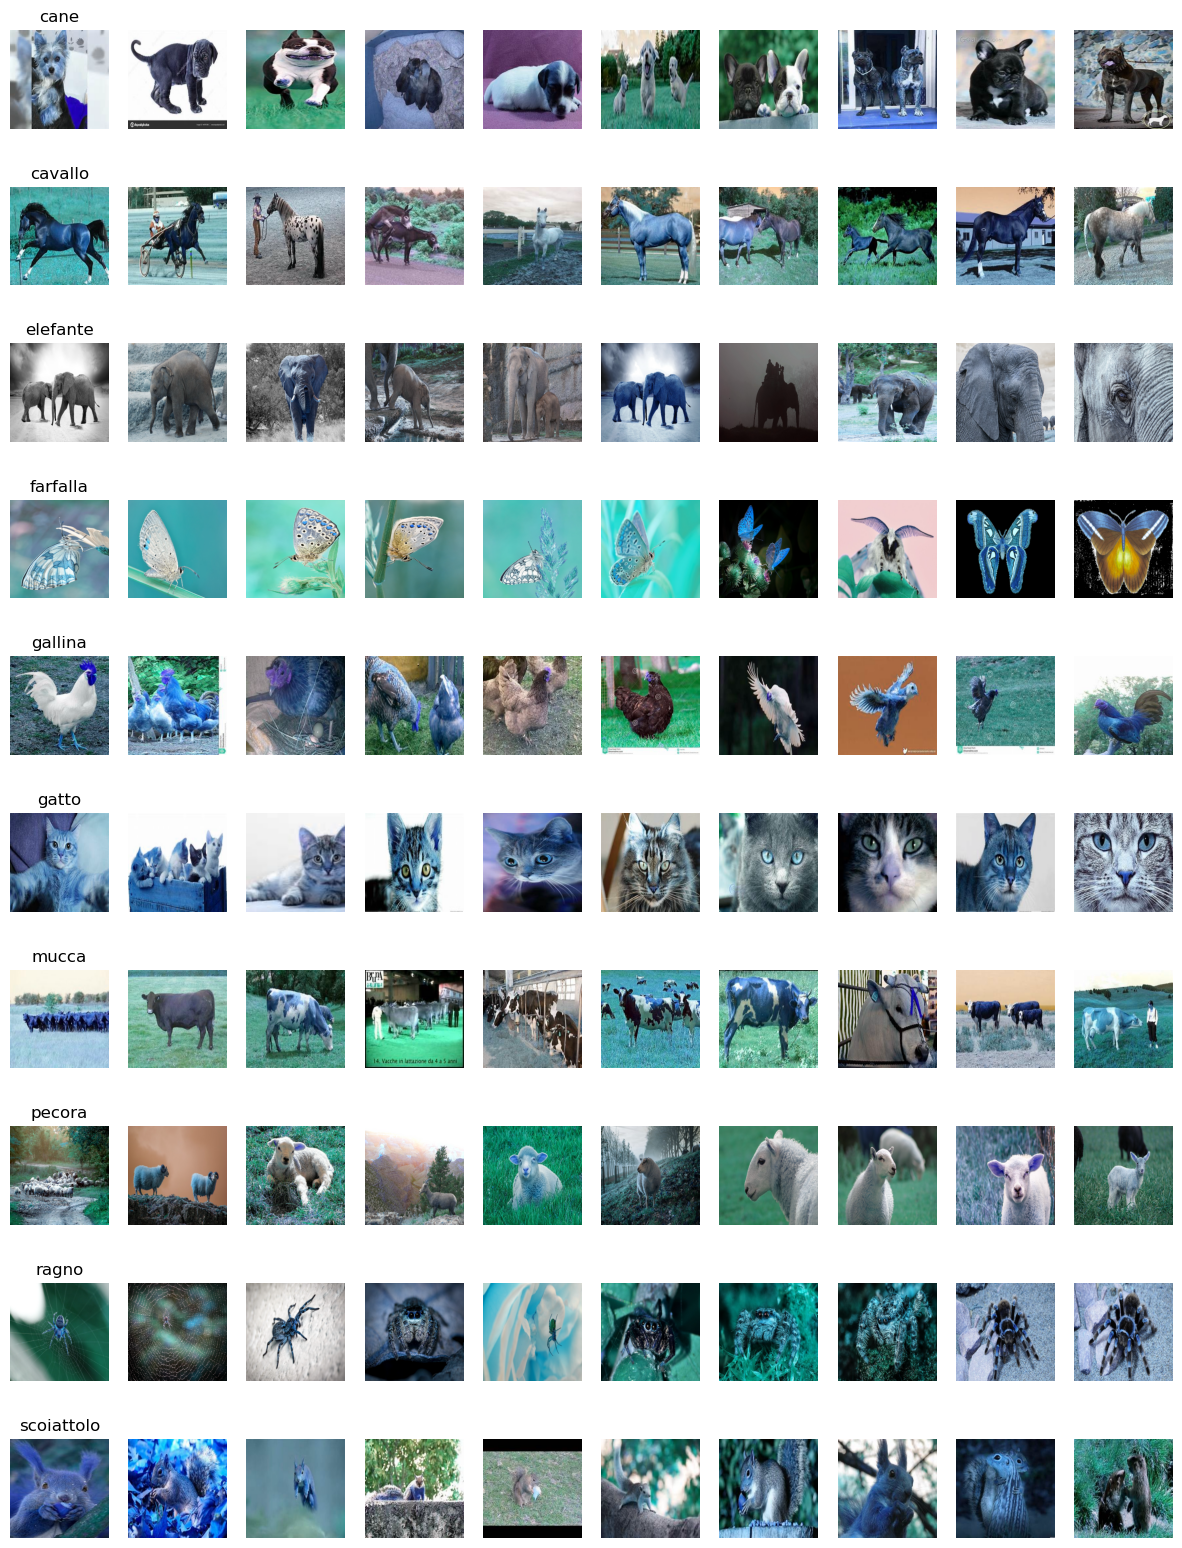

In [2]:
i=0
plt.figure(figsize=(15,20))
# dir = os.path.join("Dataset 1", "Testing")
dir = "raw-img"
for folder in os.listdir(dir):
    folderPath = os.path.join(dir, folder)
    for file in os.listdir(folderPath):
        plt.subplot(10,10,i+1)
        filepath = os.path.join(folderPath, file)
        img = cv2.imread(filepath)
        img = cv2.resize(img, (300,300))
        plt.imshow(img)
        plt.axis('off')
        if i % 10 == 0:
            plt.title(folder)
        i = i+1
        if i % 10 == 0:
            break
plt.show()

In [3]:
def getData(dir, categories):
    data = []
    IMG_SIZE = 100
    for c in categories:
        path = os.path.join(dir, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
        class_num = categories.index(c) # 0
        i = 0
        for img in tqdm(os.listdir(path)):
            if i == 500:
                break
            i = i + 1
            try:
                img_array = cv2.imread(os.path.join(path, img))   # read the image
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
                # ershape every image from (32,32) to (1,1024) for convert to 1D List
                # data.append([np.reshape(img_resized, IMG_SIZE*IMG_SIZE), class_num])
                data.append([img_resized, class_num])
            except exceptions as e:
                pass
    print(len(data))
    return data

In [4]:
CATEGORIES = []
for i in os.listdir(dir):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [5]:
data = getData(dir, CATEGORIES)

  0%|          | 0/4863 [00:00<?, ?it/s]

 27%|██▋       | 500/1862 [00:00<00:01, 818.27it/s]

5000


In [6]:
def get_x_y(data):
    x_data = []
    y_data = []
    IMG_SIZE = 100
    i = 0
    for img, label in tqdm(data):
        x_data.append(img)
        y_data.append(label)
    # x_data = (np.array(x_data)*255).astype('float32').reshape(-1,100,100,3)
    x_data = np.array(x_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)
    y_data = np.array(y_data)
    return x_data, y_data

In [7]:
random.shuffle(data)

train_data_x, train_data_y = get_x_y(data[:4000])
test_data_x, test_data_y = get_x_y(data[4000:])

print(train_data_x.shape, train_data_y.shape)
print(test_data_x.shape, test_data_y.shape)

100%|██████████| 1000/1000 [00:00<00:00, 500036.24it/s]

(4000, 100, 100, 3) (4000,)
(1000, 100, 100, 3) (1000,)


In [8]:
def pickle_dump(data, filename, dir):
  # open a file, where you stored the pickled data
  file = open(os.path.join(dir,filename), 'wb')

  # dump information to that file
  data = pickle.dump(data, file)

  # close the file
  file.close()
  return data

In [9]:
dir = "Pickle"
pickle_dump(train_data_x, "train_data_x.pk", dir)
pickle_dump(train_data_y, "train_data_y.pk", dir)
pickle_dump(test_data_x, "test_data_x.pk", dir)
pickle_dump(test_data_y, "test_data_y.pk", dir)